<a href="https://colab.research.google.com/github/pm155/time-series-airport-traffic/blob/main/airport_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd
import numpy as np

In [216]:
data = pd.read_csv("/content/air-traffic-passenger-statistics.csv")

In [217]:
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


In [218]:
data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [219]:
data.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [220]:
data.dropna(inplace=True)

In [221]:
data.shape

(18822, 12)

In [222]:
data["Activity Period"]

0        200507
1        200507
2        200507
3        200507
4        200507
          ...  
18880    201806
18881    201806
18882    201806
18883    201806
18884    201806
Name: Activity Period, Length: 18822, dtype: int64

In [223]:
data.loc[:,"Activity Period"] = pd.to_datetime(data.loc[:,"Activity Period"].astype(str), format="%Y%m")
data.loc[:,"Year"] = data["Activity Period"].dt.year
data.loc[:,"Month"] = data["Activity Period"].dt.month

In [224]:
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,2018-06-01,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,2018,6
18881,2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,2018,6
18882,2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,2018,6
18883,2018-06-01,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,2018,6


In [225]:
data.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Year', 'Month'],
      dtype='object')

In [226]:
data.set_index('Activity Period',inplace=True)
data

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
Activity Period,,,,,,,,,,,,,
2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-01,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,2018,6
2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,2018,6
2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,2018,6


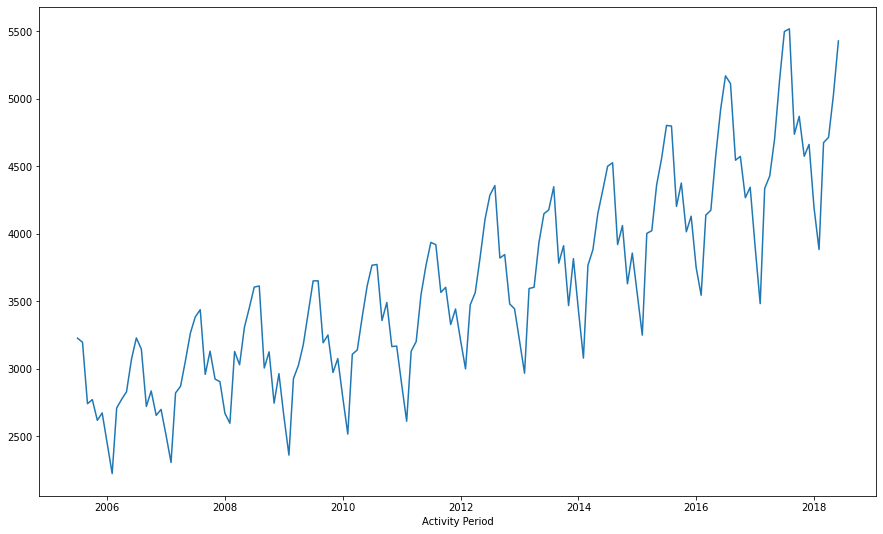

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
df_yr = data.groupby(["Activity Period"])["Passenger Count"].sum().divide(1000)

fig, ax = plt.subplots(figsize=(15,9))
sns.lineplot(x=df_yr.index, y=df_yr.values, markers=True, ax=ax,zorder=0)
plt.show()

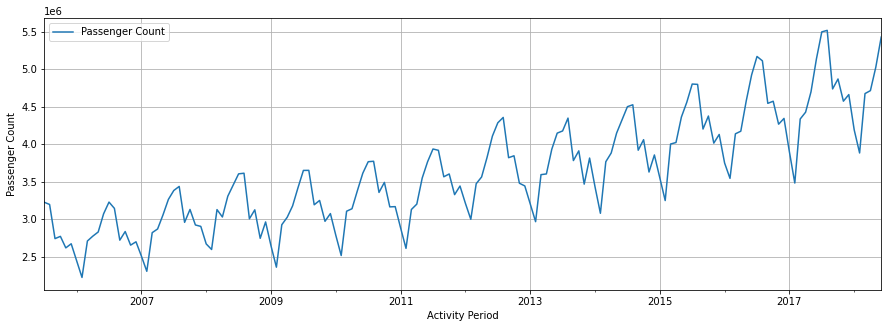

In [228]:
P1 = data.groupby("Activity Period")["Passenger Count"].sum().to_frame()

fig, ax = plt.subplots(1,1,figsize=(15,5))
P1.plot(ax=ax)
ax.set_ylabel("Passenger Count")
plt.grid(True)
plt.show()

In [229]:
from statsmodels.tsa.stattools import adfuller

values = adfuller(P1["Passenger Count"])
print('ADF Statistic is %f' % values[0])
print('P-value is %f' % values[1])
if values[1] <= 0.05:
  print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
  print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
# print('# Lags used is %f' % values[2])
# print('Number of observations used are %f' % values[3]) 

ADF Statistic is 1.132211
P-value is 0.995482
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


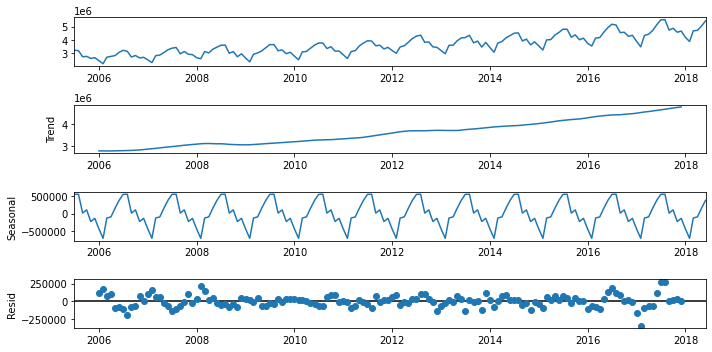

In [230]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = 10, 5
# Additive decomposition
decomposed_add = seasonal_decompose(P1, model="additive")
add = decomposed_add.plot()
plt.show()

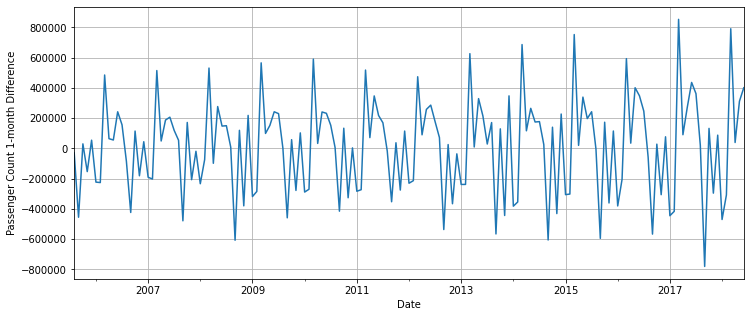

In [231]:
P1_diff = P1.diff().dropna()
plt.figure(figsize=(12,5))
ax = P1_diff["Passenger Count"].plot()
ax.set_xlabel("Date")
ax.set_ylabel("Passenger Count 1-month Difference")
plt.grid(True)
plt.show()

In [232]:
results = adfuller(P1_diff["Passenger Count"])
print('ADF Statistic: %f' % results[0])
print("P-value of a test is: {}".format(results[1]))
if results[1] <= 0.05:
  print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
  print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Statistic: -2.948525
P-value of a test is: 0.03998919907208314
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [233]:
results = adfuller(P1.diff().diff().dropna()["Passenger Count"])
print('ADF Statistic: %f' % results[0])
print("P-value of a test is: {}".format(results[1]))
if results[1] <= 0.05:
  print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
else:
  print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

ADF Statistic: -5.644797
P-value of a test is: 1.0171446565731774e-06
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



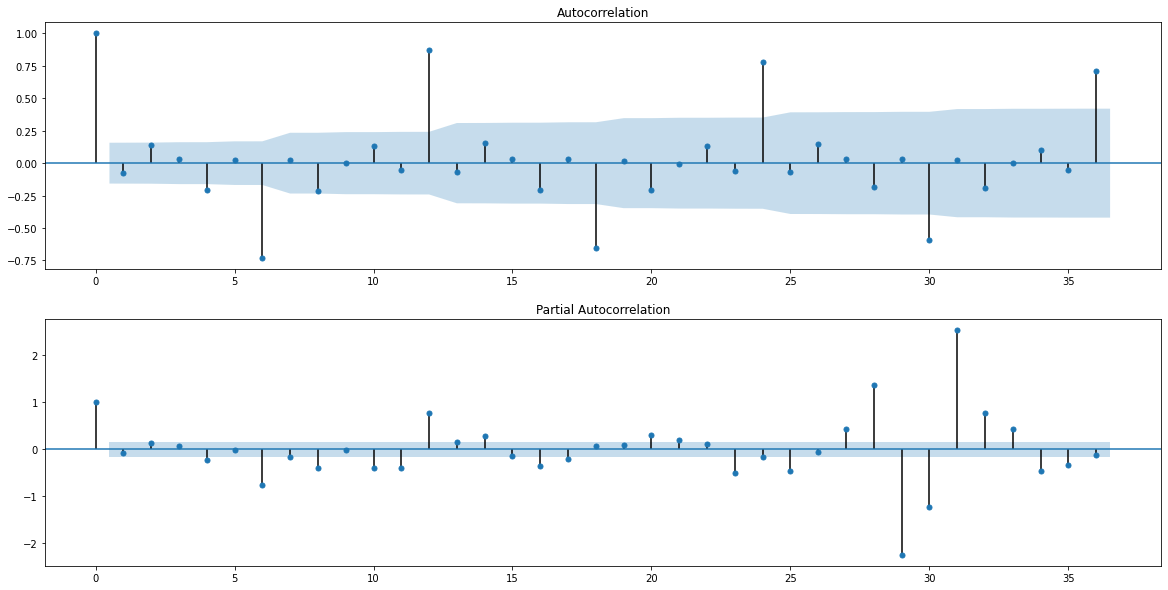

In [234]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,ax = plt.subplots(2,1,figsize=(20,10))
plot_acf(P1_diff, lags=36, ax=ax[0])
plot_pacf(P1_diff, lags=36, ax=ax[1])
plt.show()

In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

P1.index.freq = P1.index.inferred_freq
model2 = SARIMAX(P1, order=(2,1,1), seasonal_order=(0,1,0,12))
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Passenger Count   No. Observations:                  156
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1842.062
Date:                             Tue, 31 Jan 2023   AIC                           3692.123
Time:                                     01:58:13   BIC                           3703.975
Sample:                                 07-01-2005   HQIC                          3696.939
                                      - 06-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9479      0.025     38.299      0.000       0.899       0.996
ar.L2          0.0096      0.024      0.394      0.694      -0.038       0.058
ma.L1         -0.9999      0.092    -10.894      0.000      -1.180      -0.820
sigma2      8.152e+09   1.13e-11   7.23e+20      0.000    8.15e+09    8.15e+09
===================================================================================
Ljung-Box (L1) (Q):                  11.95   Jarque-Bera (JB):                 8.64
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                             0.32
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+35. Standard errors may be unstable.
"""

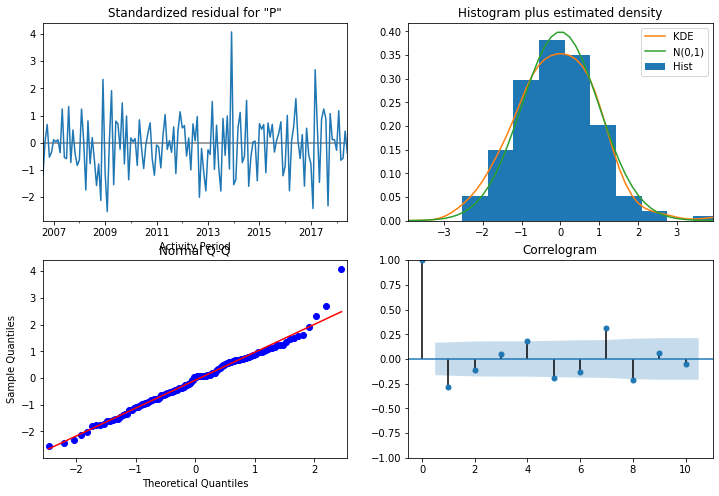

In [236]:
plt.rcParams['figure.figsize'] = 12, 8
plot = results.plot_diagnostics()
plt.show()

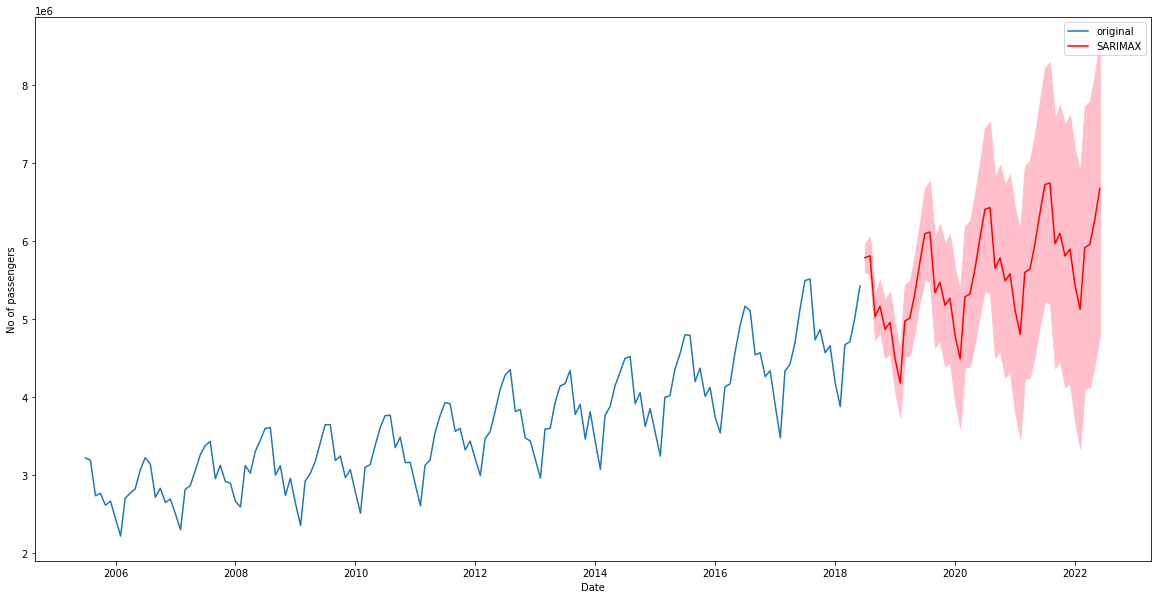

In [237]:
# Create SARIMA mean forecast
forecast = results.get_forecast(steps=48)
lower = forecast.conf_int()["lower Passenger Count"]
upper = forecast.conf_int()["upper Passenger Count"]

# Plot mean SARIMA predictions
fig,ax = plt.subplots(1,1,figsize=(20,10))

plt.plot(P1, label='original')
plt.plot(forecast.predicted_mean, label='SARIMAX', c="r")
plt.fill_between(forecast.conf_int().index, 
                 lower,upper,
                 color='pink')
plt.xlabel('Date')
plt.ylabel('No of passengers')
plt.legend()
plt.show()

In [238]:
from fbprophet import Prophet

In [239]:
df = df_yr.reset_index()
df = df.rename({'Activity Period':'ds', 'Passenger Count':'y'},axis=1)
df.head()

,ds,y
0,2005-07-01,3225.769
1,2005-08-01,3195.848
2,2005-09-01,2740.553
3,2005-10-01,2770.715
4,2005-11-01,2617.333


In [240]:
model = Prophet(changepoint_prior_scale=0.004,
                seasonality_prior_scale=20,
                seasonality_mode='multiplicative',
                changepoint_range=0.9)
model.fit(df)

In [241]:
future = model.make_future_dataframe(periods=365*3)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1246,2021-05-27,6010.410485,5894.559356,6120.622890
1247,2021-05-28,6009.767288,5899.898268,6119.401957
1248,2021-05-29,6007.813554,5890.297192,6117.326725
1249,2021-05-30,6004.856320,5899.041783,6114.646227
1250,2021-05-31,6001.229197,5890.162866,6118.281791


In [242]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)



In [243]:
from prophet.diagnostics import cross_validation, performance_metrics
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 21 forecasts with cutoffs between 2007-07-24 00:00:00 and 2017-06-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [244]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,25411.426489,159.409619,128.915001,0.036080,0.036074,0.036839,0.36
1,40 days,23102.181382,151.994018,119.458173,0.033123,0.032759,0.033765,0.40
2,41 days,22220.058303,149.063940,116.801359,0.032961,0.032759,0.033596,0.40
3,44 days,20382.705476,142.768013,111.676174,0.031505,0.032759,0.032059,0.42
4,45 days,18088.478291,134.493414,105.106422,0.029960,0.029874,0.030436,0.44


/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



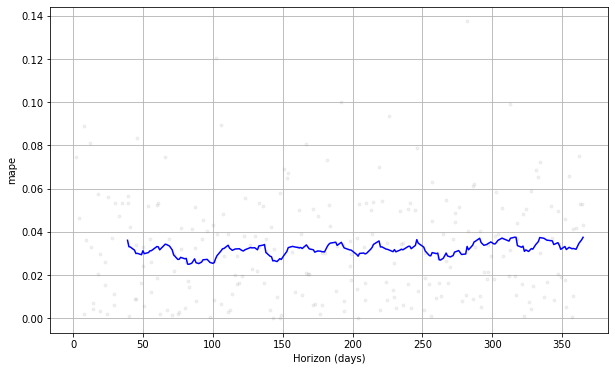

In [245]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()